<a href="https://colab.research.google.com/github/yiran597/statistics_analysis/blob/main/%E6%83%85%E6%84%9F%E5%88%86%E6%9E%90%E6%A8%A1%E5%9E%8B1sentiment_analysis_VADER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Load function, Update Environment
import sys

!{sys.executable} -m pip install numpy
import numpy as np

!{sys.executable} -m pip install sklearn
from sklearn import metrics

!{sys.executable} -m pip install pandas
import pandas as pd

!{sys.executable} -m pip install nltk
import nltk

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

from pprint import pprint
!{sys.executable} -m pip install pyLDAvis #visualizing LDA
import pyLDAvis
import pyLDAvis.lda_model

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 19.5 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Define the text normalization function
%run "/content/drive/MyDrive/lilysilk/Text_Normalization_Function.ipynb"

  Preparing metadata (setup.py) ... done
  Created wheel for html.parser: filename=html_parser-0.2-py3-none-any.whl size=1286 sha256=ebd887c4b52617898286b9b488f056b1dfa57911f5d70aa70bcb4aeaaf52d21e
  Stored in directory: /root/.cache/pip/wheels/9e/aa/98/502b17f7b11e03dfd35a42c1fa4cda6220762f34a90af79904
Successfully built html.parser


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 51.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.8/349.8 kB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 54.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.8/100.8 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.8/144.8 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.4 MB/s eta 0:00:00
  Created wheel for pattern3: filename=pattern3-3.0.0-py2.py3-none-any.whl size=18554332 sha256=97d1b85ba919cc7c99ed768c93546869b8392f5ae21b685361c52e60c8b372ce
  Stored in directory: /root/.cache/pip/wheels/0c/3b/9e/e2c0eb8db016f849b64ef1

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  ['<', 'p', '>', 'The', 'circus', 'dog', 'in', 'a', 'plissé', 'skirt', 'jumped', 'over', 'Python', 'who', 'was', "n't", 'that', 'large', ',', 'just', '3', 'feet', 'long.', '<', '/p', '>']
Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  <p>The circus dog in a plissé skirt jumped over Python who was not that large, just 3 feet long.</p>


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  [('<', 'a'), ('p', 'n'), ('>', 'v'), ('the', None), ('circus', 'n'), ('dog', 'n'), ('in', None), ('a', None), ('plissé', 'n'), ('skirt', 'n'), ('jumped', 'v'), ('over', None), ('python', 'n'), ('who', None), ('was', 'v'), ("n't", 'r'), ('that', None), ('large', 'a'), (',', None), ('just', 'r'), ('3', None), ('feet', 'n'), ('long.', 'a'), ('<', 'n'), ('/p', 'n'), ('>', 'n')]
Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  < p > the circus dog in a plissé skirt jump over python who be n't that large , just 3 foot long. < /p >
Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:    p   The circus dog in a plissé skirt jumped over Python who was n t that large   just 3 feet long     p  
Original:   <p>The circus dog in a pli

In [4]:
# Load dataset
videoreview = pd.read_csv('/content/drive/MyDrive/lilysilk/Data/translated_comments_emoji (1).csv')

In [5]:
videoreview['like_count'] = pd.to_numeric(videoreview['like_count'], errors='coerce')  # 如果无法转换，会变成 NaN
videoreview['likes'] = pd.to_numeric(videoreview['likes'], errors='coerce')  # 同样的处理
# 然后进行加法操作
videoreview['total_likes'] = videoreview.groupby('publish_number')['like_count'].transform('sum') + videoreview['likes']
videoreview['representative_comment_likes'] = videoreview['like_count'] + videoreview['likes']

In [6]:
videoreview.head(3)

,publish_number,publish_url,video_id,text_display,like_count,published_at,likes,translated_text,emoji_column,text_column,total_likes,representative_comment_likes
0,LSYT2328,https://www.youtube.com/watch?v=oHg-pvBMjb4&t=42s,oHg-pvBMjb4,"Beautiful haul, Irene. The purple top is so pr...",0,8/7/22 18:02,77.0,"Beautiful haul, Irene. The purple top is so pr...",NaN,"Beautiful haul, Irene. The purple top is so pr...",80.0,77.0
1,LSYT2328,https://www.youtube.com/watch?v=oHg-pvBMjb4&t=42s,oHg-pvBMjb4,"Beautiful pieces you got, love Lilysilk, can\'...",1,8/7/22 6:35,77.0,"Beautiful pieces you got, love Lilysilk, can\'...",NaN,"Beautiful pieces you got, love Lilysilk, can\'...",80.0,78.0
2,LSYT2328,https://www.youtube.com/watch?v=oHg-pvBMjb4&t=42s,oHg-pvBMjb4,Congrats on your haul Irene. Lily silk packagi...,0,8/9/22 17:14,77.0,Congrats on your haul Irene. Lily silk packagi...,:smiling_face_with_heart-eyes::brown_heart::pu...,Congrats on your haul Irene. Lily silk packagi...,80.0,77.0


In [7]:
## new dataframe with only publish_number, published_at, total_likes
videolike = videoreview.groupby('publish_number').agg(
    total_video_likes=('total_likes','max'),
    published_at=('published_at', 'first')  # 保留每个视频的第一个 published_at
).reset_index()

In [8]:
videolike.head(3)

,publish_number,total_video_likes,published_at
0,LSYT2328,80.0,8/7/22 18:02
1,LSYT2657,839.0,11/23/22 10:43
2,LSYT2984,156.0,4/23/23 15:24


## Creating Corpus

In [9]:
reviews = videoreview.text_column # X
likes = videoreview.representative_comment_likes # Y

In [10]:
# review one of X
reviews[0]

'Beautiful haul, Irene. The purple top is so pretty and looks awesome on you. The calvi card holder is gorgeous, the gold is wonderful. The leather tote bag from MJ is great. Congratulations!'

In [11]:
import pickle
with open('Review.pickle','wb') as f:
    pickle.dump(reviews,f)

with open('sent.pickle','wb') as f:
    pickle.dump(likes,f)

In [12]:
reviews_in = open('Review.pickle','rb')
likes_in = open('sent.pickle','rb')
reviews = pickle.load(reviews_in)
likes = pickle.load(likes_in)

In [13]:
import re
reviews_corpus = []
for i in range(0, len(reviews)):
    review = re.sub(r'\W', ' ', str(reviews[i]))
    review = review.lower()
    review = re.sub(r'^br$', ' ', review)
    review = re.sub(r'\s+[a-z]\s+', ' ',review)
    review = re.sub(r'^[a-z]\s+', '', review)
    review = re.sub(r'\s+', ' ', review)
    reviews_corpus.append(review)

In [ ]:
reviews_corpus[1]

#### **Sentiment Analysis**
- Why we want to have sentiment analysis: Sentiment analysis is the process of analyzing digital text to determine if the emotional tone of the message is positive, negative, or neutral.

- VADER: VADER( Valence Aware Dictionary for Sentiment Reasoning) is an NLTK module that provides sentiment scores based on the words used. It is a rule-based sentiment analyzer in which the terms are generally labeled as per their semantic orientation as either positive or negative.

In [14]:
normalized_reviews = normalize_corpus(reviews_corpus)

In [15]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [16]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [17]:
def analyze_sentiment_vader_lexicon(review, threshold = 0.1, verbose = False):
    scores = analyzer.polarity_scores(review)
    binary_sentiment = 'positive' if scores['compound'] >= threshold else 'negative'
    if verbose:
        print('VADER Polarity (Binary):', binary_sentiment)
        print('VADER Score:', round(scores['compound'], 2))
    return binary_sentiment,scores['compound']

In [18]:
sample_docs = [60,360 ]
for doc_index in sample_docs:
    print('\nReview text:\n')
    print(reviews[doc_index],"\n")
    final_sentiment = analyze_sentiment_vader_lexicon(normalized_reviews[doc_index],
                                                        threshold=0.1,
                                                        verbose=True)
    print('-'*60)


Review text:

Have a Happy Thanksgiving  

VADER Polarity (Binary): positive
VADER Score: 0.57
------------------------------------------------------------

Review text:

Emica is very lively and fast...A very cute child and of course a mom too 

VADER Polarity (Binary): positive
VADER Score: 0.71
------------------------------------------------------------


In [19]:
VADER_polarity_test = [analyze_sentiment_vader_lexicon(review, threshold=0.1) for review in normalized_reviews]
VADER_polarity_test_df = pd.DataFrame(VADER_polarity_test, columns = ['VADER Polarity','VADER Score'])
VADER_polarity_test_df.head()

,VADER Polarity,VADER Score
0,positive,0.9829
1,positive,0.8442
2,positive,0.9821
3,positive,0.9493
4,positive,0.9601


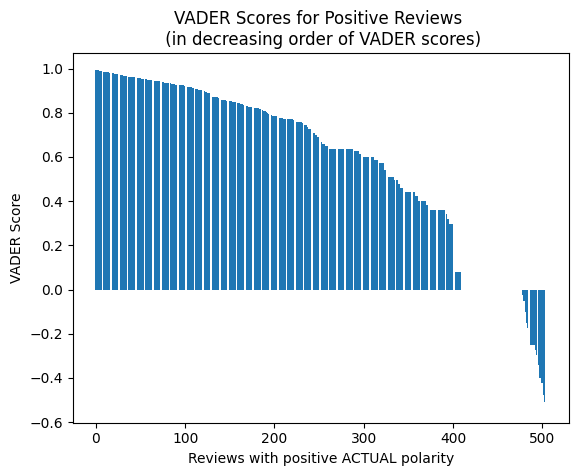

In [20]:
import matplotlib.pyplot as plt

pos_reviews_scored = VADER_polarity_test_df[:505]['VADER Score']
plt.bar(range(0, 505), pos_reviews_scored.sort_values(ascending=False))
plt.xlabel("Reviews with positive ACTUAL polarity")
plt.ylabel("VADER Score")
plt.title("VADER Scores for Positive Reviews \n (in decreasing order of VADER scores)")
plt.show()

代码从数据框中选择了前 505 个样本的 VADER Score 进行了排序作图，所以该图显示了前 505 条正向评论的 VADER 情感分数（从正向到负向）。从图中可以看到，大部分正向评论的情感分数都在 0.5 到 1 之间，表明大多数评论都具有较强的正向情感（接近 1）。图表的右侧有一些较低的 VADER 分数（接近 0 或负数），这些评论可能包含一些轻微的负向情感，虽然它们仍被视为正向评论。

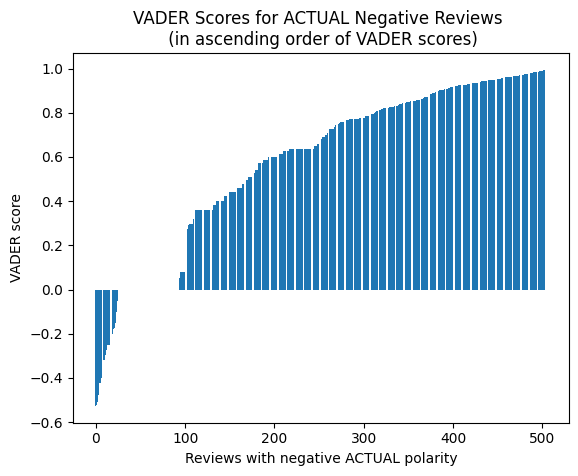

In [21]:
neg_reviews_scored = VADER_polarity_test_df[:505]['VADER Score']
plt.bar(range(0, 505), neg_reviews_scored.sort_values(ascending=True))
plt.xlabel("Reviews with negative ACTUAL polarity")
plt.ylabel("VADER score")
plt.title("VADER Scores for ACTUAL Negative Reviews \n (in ascending order of VADER scores)")
plt.show()

上图是关于 负向评论 的 VADER 分数，且这些分数是按照 升序 排列的。所以该图显示了前 505 条负向评论的 VADER 情感分数（从最负向到最正向）。VADER 的情感分数通常在 -1（非常负向）和 1（非常正向）之间，表示评论的情感极性。

从图中可以看到，负向评论的情感分数大多数集中在 负数区间，尤其接近 -0.6 到 -0.2 之间，意味着这些评论的情感大多是负面的。然而，图表的右侧存在一些较高的 VADER 分数（接近 0 或正数），这可能是一些含有轻微负向情感的评论（如表达某种不满但并未完全消极的评论）。

可以看出绝大多数评论都是正向的。

## Improvement（优化）
### Steps:
1. fine-tune it by adjusting the threshold parameter for defining positive polarity (current set = 0.1)
2. define a function that computes accuracy rate for different value of the threshold and call the function try_threshold_for_ccuracy. The function will take the VADER score and the threshold parameter as inputs and return the accuracy rate, associated with the inputs.

In [22]:
# Polarity:
polarities = VADER_polarity_test_df.iloc[:,0]
polarities

,VADER Polarity
0,positive
1,positive
2,positive
3,positive
4,positive
...,...
9995,positive
9996,positive
9997,positive
9998,positive


In [23]:
def try_threshold_for_accuracy(sentiment_scores, threshold_for_pos):
    VADER_binary_polarity = ['positive' if s >= threshold_for_pos else 'negative' for s in list(sentiment_scores)]
    accuracy = metrics.accuracy_score(polarities, VADER_binary_polarity)
    return(accuracy)

In [24]:
threshold = 0.5
print("Accuracy rate: ", try_threshold_for_accuracy(VADER_polarity_test_df['VADER Score'],threshold))

Accuracy rate:  0.8694


The accuracy rate = 0.8694: 说明当使用阈值 0.5 时，预测的情感分类与实际的情感标签（polarities）的匹配度为 86.94%。

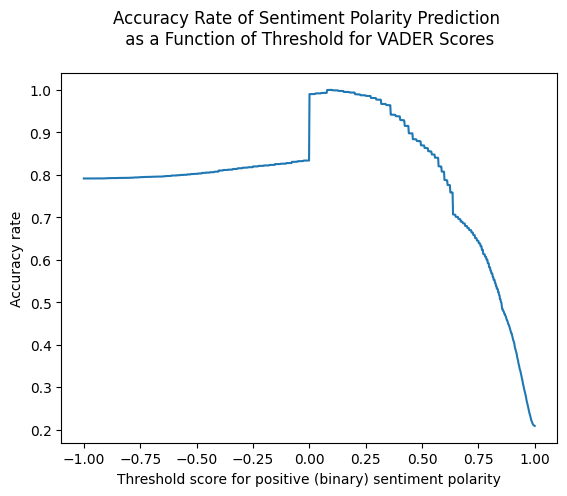

In [25]:
thresholds = np.linspace(-1,1,1000)
acc_rates = [try_threshold_for_accuracy(VADER_polarity_test_df['VADER Score'],threshold) for threshold in thresholds]

plt.plot(thresholds, acc_rates)
plt.xlabel("Threshold score for positive (binary) sentiment polarity")
plt.ylabel("Accuracy rate")
plt.title("Accuracy Rate of Sentiment Polarity Prediction \n as a Function of Threshold for VADER Scores \n")
plt.show()

这个图表展示了 VADER 分数的阈值与模型准确率之间的关系，并且存在 垂直上升 的情况。垂直上升发生在阈值设定为某个特定数值时，模型的预测结果发生了剧烈变化（从较低准确率跃升到较高准确率）。这表明这个阈值是模型在这组数据上性能最优化的位置。

In [26]:
thresholds[acc_rates.index(max(acc_rates))]

0.0930930930930931

当 VADER 分数大于 0.093 时，模型的准确率达到了最高值。

In [27]:
#accuracy rate at optimized threshold
max(acc_rates)

1.0

最佳阈值：通过对 VADER 情感分数与阈值的关系进行探索，找到了最佳的阈值 0.093，此时模型的准确率为 100%（即完美分类）。

reset threshold = 0.093

In [28]:
def analyze_sentiment_vader_lexicon_best(review, threshold = 0.093, verbose = False):
    scores = analyzer.polarity_scores(review)
    binary_sentiment = 'positive' if scores['compound'] >= threshold else 'negative'
    if verbose:
        print('VADER Polarity (Binary):', binary_sentiment)
        print('VADER Score:', round(scores['compound'], 2))
    return binary_sentiment,scores['compound']

In [32]:
sample_docs2 = [59,361 ]
for doc_index in sample_docs2:
    print('\nReview text:\n')
    print(reviews[doc_index],"\n")
    final_sentiment = analyze_sentiment_vader_lexicon_best(normalized_reviews[doc_index],
                                                        threshold=0.093,
                                                        verbose=True)
    print('-'*60)


Review text:

Great video, thanks! You look amazing in your shirt and I love your eye makeup. Have a great week!  

VADER Polarity (Binary): positive
VADER Score: 0.96
------------------------------------------------------------

Review text:

I enjoy every video 

VADER Polarity (Binary): positive
VADER Score: 0.49
------------------------------------------------------------


In [33]:
VADER_polarity_test1 = [analyze_sentiment_vader_lexicon_best(review, threshold=0.093) for review in normalized_reviews]
VADER_polarity_test_df1 = pd.DataFrame(VADER_polarity_test1, columns = ['VADER Polarity','VADER Score'])
VADER_polarity_test_df1.head(20)

,VADER Polarity,VADER Score
0,positive,0.9829
1,positive,0.8442
2,positive,0.9821
3,positive,0.9493
4,positive,0.9601
5,positive,0.9670
6,positive,0.6124
7,positive,0.7351
8,positive,0.8316
9,positive,0.9531


In [34]:
polarities1 = VADER_polarity_test_df1.iloc[:,0]

def try_threshold_for_accuracy1(sentiment_scores, threshold_for_pos):
    VADER_binary_polarity = ['positive' if s >= threshold_for_pos else 'negative' for s in list(sentiment_scores)]
    accuracy = metrics.accuracy_score(polarities, VADER_binary_polarity)
    return(accuracy)

threshold = 0.093
print("Accuracy rate: ", try_threshold_for_accuracy1(VADER_polarity_test_df1['VADER Score'],threshold))

Accuracy rate:  1.0


提取非常正面的评价：（vader score > 0.95)

In [36]:
import pandas as pd

vader_results = []

for review in normalized_reviews:
  sentiment, score = analyze_sentiment_vader_lexicon_best(review, threshold=0.093)
  vader_results.append((review, score))

vader_df = pd.DataFrame(vader_results, columns=['Review', 'VADER Score'])

In [37]:
filtered_vader_df = vader_df[vader_df['VADER Score'] > 0.95]

In [39]:
filtered_vader_df

,Review,VADER Score
0,beautiful haul irene purple top pretty look aw...,0.9829
2,congrats haul irene lily silk packaging pretty...,0.9821
4,fab video love calvi use load exact colour mj ...,0.9601
5,fabulous slg love review love colour love marc...,0.9670
9,great piece lilysilk love mj bag love cardhold...,0.9531
...,...,...
9966,happy happy birthday lydia happy chicken wonde...,0.9584
9967,happy happy happy birthday lydia yes every tru...,0.9612
9972,hello lydia fellow gardener exciting passion c...,0.9884
9991,wait particular vlog lydia ali beautiful job r...,0.9628


### 分析1: 进行主题建模：
可以使用 主题建模（例如 LDA）来提取这些评论中的主题，了解客户对哪些方面的产品或服务表达了最强的正面情感。

通过 LDA 或 NMF（非负矩阵分解）对评论进行建模，提取出代表产品特点或品牌优势的主题（如“舒适”、“高质量”、“漂亮”等）。

这些主题可以为你提供 产品亮点，例如：如果很多评论都提到产品的“舒适性”或“设计”，这可能是推广产品时的一个卖点。

### 分析2: 关键词提取和词云分析：

提取高频关键词：利用 TF-IDF 或 TextRank 算法来提取评论中的高频词汇。可以使用词云图来展示评论中最常出现的正面关键词，如“love”，“amazing”，“best”等。

从这些关键词中，你可以识别出哪些产品特点或品牌元素在正面评论中最常被提及。

目前：将目前提取到的非常正面的评价：（vader score > 0.95)【均来自Youtube视频】，先做有关其的主题建模和关键词提取和词云分析模型，两个模型建立好了之后都可以直接替换数据重新跑。